In [1]:
# Author: Andi Sama
# Organization: Sinergi Wahana Gemilang
#   a Value Added Distributor in Jakarta, Indonesia
# Created: February 7, 2018
# Last modified: February 8, 2018
#   - minor changes, typo in comments
#   - add model visualization (using keras API)
# Topic: A simple step by step to understand deep learning
# Purpose: Illustration on how to do Deep Learning 
#   - Load existing dataset (data uploaded to IBM DSX Object Storage)
#   - Data preparation to be ready to be processed by Neural Network
#     (data encoding for non numbers, split data: train + test + expected output)
#   - Build, Test Neural Network
#     build layers, compile, fit, measure accuracy performance
# Type of Learning: Supervised
# Platform: Jupyter Notebook with Python 2 with Spark 2.0
#   on IBM Data Science Experience (on IBM Cloud)
#     - pandas for data frame manipulation
#     - numpy for scientific matrix manipulation
#     - matplotlib for scientific visualization
# Dataset: https://drive.google.com/file/d/0By9Y49AzZGaUemtpNWtQMWdqRDA/view 
#   structured data with 10,000 records, 14 fields (customer churn)
# Reference: Build your First Deep Learning Neural Network Model using Keras in Python
#   https://medium.com/@pushkarmandot/
#     build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

A. PREPARATION

Step 1. Importing Required Libraries

In [2]:
# first overall, importing the required libraries
import numpy as np # matrix manipulation
import matplotlib.pyplot as plt # visualization
import pandas as pd # dataframe
import sys # for IBM DSX, accessing dataset in IBM Object Storage
import types # for IBM DSX, accessing dataset in IBM Object Storage

B. DATA PRE-PROCESSING

Step 2. Importing required data

In [3]:
# The code was removed by DSX for sharing.

In [4]:
# take a look at the data
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# print dataset.describe(include="all")
# show some statistics about the dataset
print(dataset.describe())

         RowNumber       CustomerId   CreditScore           Age        Tenure  \
count  10000.00000     10000.000000  10000.000000  10000.000000  10000.000000   
mean    5000.50000  15690940.569400    650.528800     38.921800      5.012800   
std     2886.89568     71936.186123     96.653299     10.487806      2.892174   
min        1.00000  15565701.000000    350.000000     18.000000      0.000000   
25%     2500.75000  15628528.250000    584.000000     32.000000      3.000000   
50%     5000.50000  15690738.000000    652.000000     37.000000      5.000000   
75%     7500.25000  15753233.750000    718.000000     44.000000      7.000000   
max    10000.00000  15815690.000000    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797  

Step 3. Prepare training data & target output for Supervised Learning

In [6]:
# python indexing starts with 0
# select all rows for training data (matrix of features)
#   starting from 3rd index "Credit Score" to (max column - 1), meaning excluding "Exited"
X = dataset.iloc[:, 3:13]
# select all rows for target data (matrix of target output variables)
#   for last column only, "Exited" status
y = dataset.iloc[:, 13]

In [7]:
# print X
# print y
# print pd.isnull(X)

Step 4. Encoding string variables

In [8]:
# string variables need to be encoded to numeric for further processing
# in this case, this applies to Geography ("France", "Spain", ...) & Gender ("Male"m "Female")
# tools: use LabelEncoder in ScikitLearn libary, automatic label replacement
#   with sequence of numeric (starting from 0)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  

In [9]:
# view & verify what we are going to change
# print(X.iloc[:,1]) # Geography
# print(X.iloc[:,2]) # Gender

In [10]:
# do the label encoding
labelencoder_X_1 = LabelEncoder()
X.iloc[:, 1] = labelencoder_X_1.fit_transform(X.iloc[:, 1])
labelencoder_X_2 = LabelEncoder()
X.iloc[:, 2] = labelencoder_X_2.fit_transform(X.iloc[:, 2])

In [11]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

In [12]:
X = X[:, 1:]

Step 5. Spliting the dataset into Train & Test (80%:20%)

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
# the split is now 75%:25%; it can also be 80%:20% or even 60%:40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Step 6. Data standarization by scaling (feature scaling)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C. BUILDING NEURAL NETWORK

Step 7. Importing required Neural Network modules

In [17]:
# importing sequential module from keras framework
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


Step 8. Initializing Neural Network

In [18]:
classifier = Sequential()

Step 9. Adding hidden layers to Neural Network

output_dim, input_dim (dimension) is the # of output/input nodes for this layer

In [19]:
# adding the input layer and the 1st hidden layer
classifier.add(Dense(output_dim=6, init='uniform', activation='relu', input_dim=11))

In [20]:
# adding the 2nd hidden layer
classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))

In [21]:
# adding the 3rd hidden layer
classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))

In [22]:
# finally, the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

Step 10. Compiling the Neural Network

In [23]:
# adam (adaptive moment estimation) is the selected SGD (stochastic gradient descent)
#  algorithm to find optimal weights in Neural Network
# binary_crossentropy is the logarithmic loss function (our dependent variable is binary)
#  for example 'categorical_entropy' is used when the dependent variable has more than 2 categories in output
# accuracy is the selected metric for performance improvement to be based on
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Step 11. Train the Neural Network => generates neural network model

In [24]:
# fit the model
hist = classifier.fit(X_train, y_train, batch_size=32, nb_epoch=50)

Epoch 1/50
7500/7500 [==============================] - 0s - loss: 0.5717 - acc: 0.7981     
Epoch 2/50
7500/7500 [==============================] - 0s - loss: 0.4339 - acc: 0.7993     
Epoch 3/50
7500/7500 [==============================] - 0s - loss: 0.4268 - acc: 0.7993     - ETA: 0s - loss: 0.4465 - acc: 0.
Epoch 4/50
7500/7500 [==============================] - 0s - loss: 0.4233 - acc: 0.7993     
Epoch 5/50
7500/7500 [==============================] - 0s - loss: 0.4205 - acc: 0.7993     
Epoch 6/50
7500/7500 [==============================] - 0s - loss: 0.4176 - acc: 0.7993     
Epoch 7/50
7500/7500 [==============================] - 0s - loss: 0.4152 - acc: 0.8025     
Epoch 8/50
7500/7500 [==============================] - 0s - loss: 0.4132 - acc: 0.8272     
Epoch 9/50
7500/7500 [==============================] - 0s - loss: 0.4115 - acc: 0.8297     
Epoch 10/50
7500/7500 [==============================] - 0s - loss: 0.4102 - acc: 0.8331     
Epoch 11/50
7500/7500 [============

In [25]:
# print hist.history

Step 12. Predicting the test result

In [26]:
classifier.save("churn_model_epoch50.hdf5")

In [27]:
hist = classifier.fit(X_train, y_train, batch_size=32, nb_epoch=50)

Epoch 1/50
7500/7500 [==============================] - 0s - loss: 0.3907 - acc: 0.8396     
Epoch 2/50
7500/7500 [==============================] - 0s - loss: 0.3913 - acc: 0.8403     
Epoch 3/50
7500/7500 [==============================] - 0s - loss: 0.3911 - acc: 0.8388     
Epoch 4/50
7500/7500 [==============================] - 0s - loss: 0.3906 - acc: 0.8395     
Epoch 5/50
7500/7500 [==============================] - 0s - loss: 0.3906 - acc: 0.8396     
Epoch 6/50
7500/7500 [==============================] - 0s - loss: 0.3905 - acc: 0.8416     
Epoch 7/50
7500/7500 [==============================] - 0s - loss: 0.3901 - acc: 0.8401     
Epoch 8/50
7500/7500 [==============================] - 0s - loss: 0.3903 - acc: 0.8425     
Epoch 9/50
7500/7500 [==============================] - 0s - loss: 0.3903 - acc: 0.8407     
Epoch 10/50
7500/7500 [==============================] - 0s - loss: 0.3900 - acc: 0.8417     
Epoch 11/50
7500/7500 [==============================] - 0s - loss: 0

In [28]:
classifier.save("churn_model_epoch100.hdf5")

In [29]:
# check recorded loss & accuracy
# print hist.history

In [30]:
# verify that models have been generated 
!ls -al *.hdf5

-rw------- 1 s442-595b4f813a3de1-85d300ba5a34 users 23152 Feb  8 03:02 churn_model_epoch100.hdf5
-rw------- 1 s442-595b4f813a3de1-85d300ba5a34 users 23152 Feb  8 03:02 churn_model_epoch50.hdf5


In [31]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Step 13. Evaluating model performance (accuracy)

In [32]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
#confusion matrix
#               event          no-event
# event      true positive   false positive
# no-event   false negative  true negative
print cm

# calculating model performance from the confusion matrix
cm_truepositive = float(cm[0,0])
cm_truenegative = float(cm[1,1])
cm_total = float(cm[0,0] + cm[0,1] + cm [1,0] + cm [1,1])
cm_accuracy = float((cm_truepositive + cm_truenegative) / cm_total)

[[1902   66]
 [ 365  167]]


In [34]:
# accuracy in %
print (cm_accuracy*100)

82.76


Step 14. Visualizing Results

In [35]:
# e.g. can use pyplot here to do some visualization as needed

# visualizing our model
# generate the model image
from keras.utils.visualize_util import plot
plot(classifier, to_file='churn_model.png', show_shapes = True, show_layer_names = True)

# verify that the image has been generated successfully
!ls -al churn_model.png

-rw------- 1 s442-595b4f813a3de1-85d300ba5a34 users 27742 Feb  8 03:02 churn_model.png


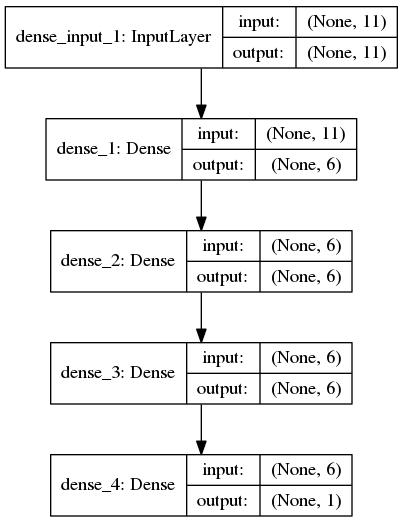

In [36]:
# view the generated .png image (model)
from IPython.display import Image
Image(filename='churn_model.png') 

Step 15. Loading "saved model" to be used in the application

In [37]:
# 1st approach to load saved model
# from keras.models import load_model
# classifier.load_model("churn_model_epoch50.hdf5")
# ...
# use model here...
# ...
#
# alternatively can use the following approach:
# import h5py
# with h5py.File('churn_model_epoch50.hdf5', 'r') as f:
#    x_data = f['x_data']
#    model_variable.predict(x_data)